# Exploration 3: First Camera Sticker App (Face Recognition)
---

### Datasets
* Pictures were all downloaded from [pixaby](https://pixabay.com/)
* Stickers were all downloaded from [flaticon](https://www.flaticon.com/)

### Methods

* HOG + Linear SVM face detector
* MMOD Human Face Detector 

### Goals

1. Use different types of pictures
2. Find alternatives for the unrecognized pictures

---


## Importing Dependencies


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import dlib
import math

print("all imported!")

all imported!


## Image preparation

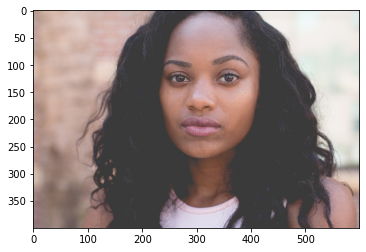

In [2]:
my_image_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/woman.png'
img_bgr = cv2.imread(my_image_path)
img_bgr = cv2.resize(img_bgr, (600, 400)) # to see pictures in the same size
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # convert BGR to RGB
plt.imshow(img_rgb)
plt.show()

## Face detection

rectangles[[(221, 77) (407, 263)]]


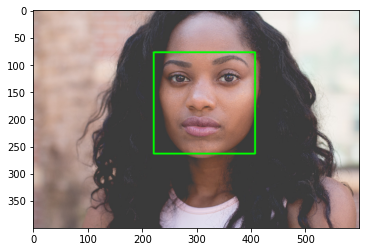

In [3]:
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)

print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l, t), (r, b), (0, 255, 0), 2, lineType=cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## Face Landmark

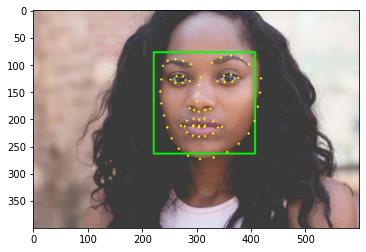

In [4]:
model_path = os.getenv("HOME") + '/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## Putting sticker

In [5]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[33]) # nose center index : 33
    x = landmark[33][0]
    y = landmark[33][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(304, 186)
(x,y) : (304,93)
(w,h) : (187,187)


(187, 187, 3)


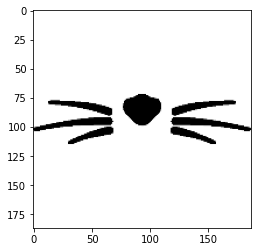

In [6]:
sticker_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))
print(img_sticker.shape)

plt.imshow(img_sticker)
plt.show()

In [7]:
refined_x = x - w // 2
refined_y = y
print('(x, y): (%d, %d)'%(refined_x, refined_y))

(x, y): (211, 93)


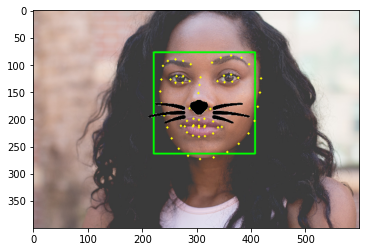

In [8]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8)
#     np.where(img_sticker==0, img_sticker, sticker_area).astype(np.uint8)


plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

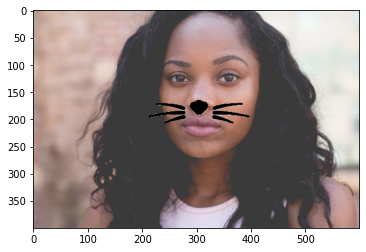

In [9]:
# without the marks
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## Different types of pictures

### 0. Baby face - Success

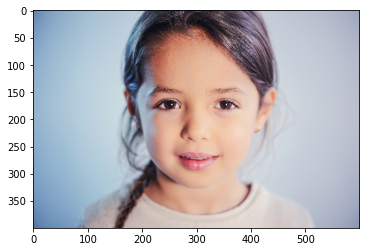

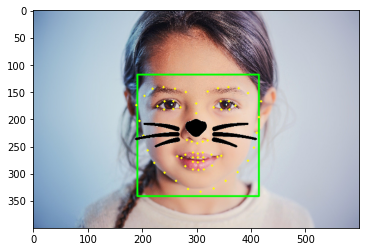

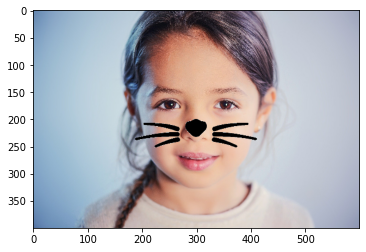

In [10]:
# Importing original picture
my_image_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/baby.png'
img_bgr = cv2.imread(my_image_path)
img_bgr = cv2.resize(img_bgr, (600, 400))
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)

# shaping a box
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l, t), (r, b), (0, 255, 0), 2, lineType=cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

# landmark
model_path = os.getenv("HOME") + '/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

# place and size of the sticker
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[30][0] # 33 seemed too low
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    
# import sticker and resize
sticker_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))

# adjusting x, y coordinates
refined_x = x - w // 2
refined_y = y - w //2

# putting a sticker
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# final image
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 1. Beard - Success

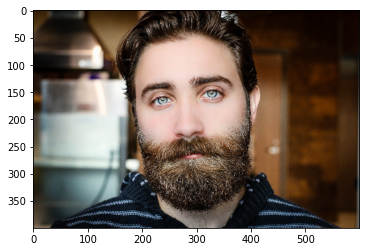

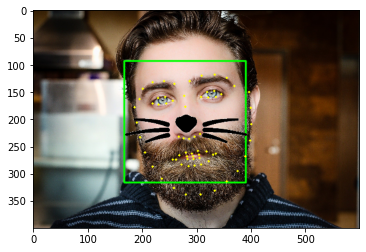

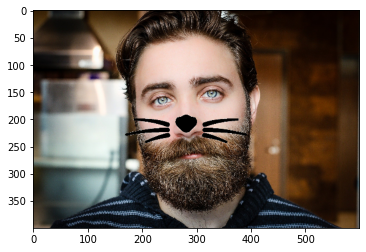

In [11]:
# Importing original picture
my_image_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/beard.png'
img_bgr = cv2.imread(my_image_path)
img_bgr = cv2.resize(img_bgr, (600, 400))
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)

# shaping a box
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l, t), (r, b), (0, 255, 0), 2, lineType=cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

# landmark
model_path = os.getenv("HOME") + '/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

# place and size of the sticker
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    
# import sticker and resize
sticker_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))

# adjusting x, y coordinates
refined_x = x - w // 2
refined_y = y - w //2

# putting a sticker
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# final image
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 2. Glasses - Fail

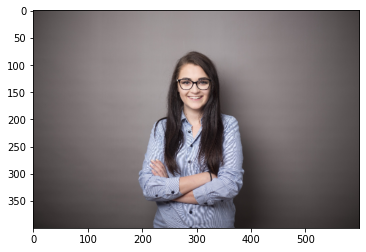

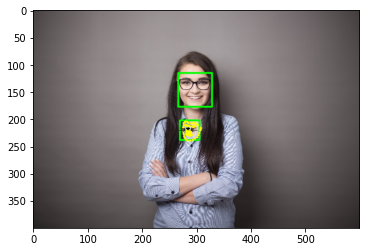

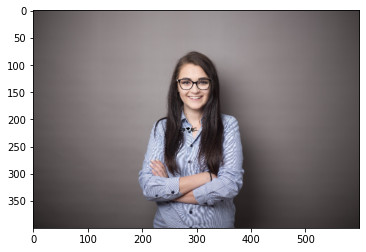

In [12]:
# Importing original picture
my_image_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/glasses.png'
img_bgr = cv2.imread(my_image_path)
img_bgr = cv2.resize(img_bgr, (600, 400))
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)

# shaping a box
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l, t), (r, b), (0, 255, 0), 2, lineType=cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

# landmark
model_path = os.getenv("HOME") + '/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

# place and size of the sticker
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    
# import sticker and resize
sticker_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))

# adjusting x, y coordinates
refined_x = x - w // 2
refined_y = y - w //2

# putting a sticker
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# final image
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 3. Tilted - Success

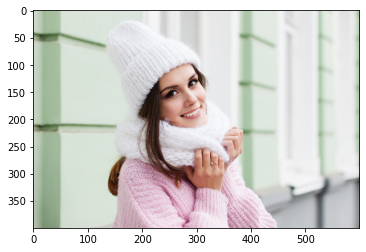

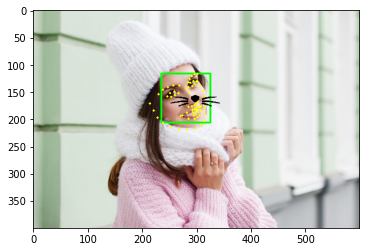

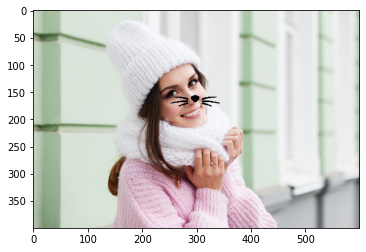

In [13]:
# Importing original picture
my_image_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/tilted.png'
img_bgr = cv2.imread(my_image_path)
img_bgr = cv2.resize(img_bgr, (600, 400))
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)

# shaping a box
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l, t), (r, b), (0, 255, 0), 2, lineType=cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

# landmark
model_path = os.getenv("HOME") + '/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

# place and size of the sticker
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    
# import sticker and resize
sticker_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))

# adjusting x, y coordinates
refined_x = x - w // 2
refined_y = y - w //2

# putting a sticker
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# final image
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

Detecting face wasn't a problem but need to do something with that sticker.
It's way too unnatural.

### 3-1. Tilting sticker

In [14]:
tan_theta = (landmark[33][0]-landmark[27][0])/(landmark[33][1]-landmark[27][1]) # the bottom and the top of the nose
theta = np.arctan(tan_theta)
rotate_angle = theta *180/math.pi
print(rotate_angle)

26.56505117707799


(91, 91, 3)


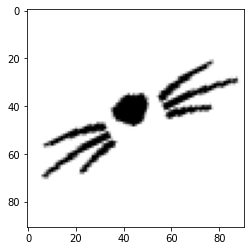

In [15]:
def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR,borderValue=(255,255,255))
  return result

sticker_rotate = rotate_image(img_sticker,rotate_angle)
print(sticker_rotate.shape)
plt.imshow(sticker_rotate)
plt.show()

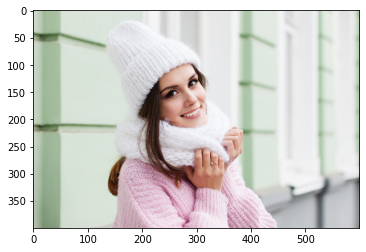

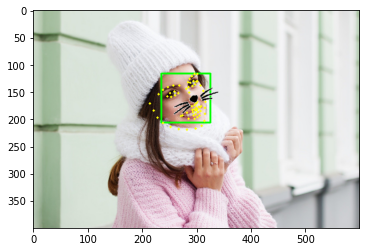

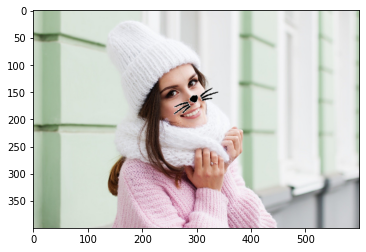

In [16]:
# Importing original picture
my_image_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/tilted.png'
img_bgr = cv2.imread(my_image_path)
img_bgr = cv2.resize(img_bgr, (600, 400))
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)

# shaping a box
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l, t), (r, b), (0, 255, 0), 2, lineType=cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

# landmark
model_path = os.getenv("HOME") + '/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

# putting a sticker
sticker_area = img_show[refined_y:refined_y+sticker_rotate.shape[0], refined_x:refined_x+sticker_rotate.shape[1]]
img_show[refined_y:refined_y+sticker_rotate.shape[0], refined_x:refined_x+sticker_rotate.shape[1]] = \
    np.where(sticker_rotate==255, sticker_area, sticker_rotate).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# final image
sticker_area = img_bgr[refined_y:refined_y+sticker_rotate.shape[0], refined_x:refined_x+sticker_rotate.shape[1]]
img_bgr[refined_y:refined_y+sticker_rotate.shape[0], refined_x:refined_x+sticker_rotate.shape[1]] = \
    np.where(sticker_rotate==255, sticker_area,sticker_rotate).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 4. Mask - Epic fail

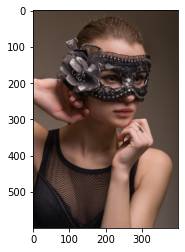

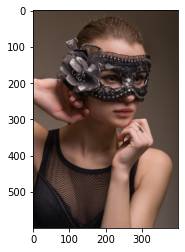

In [17]:
# Importing original picture
my_image_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/mask.png'
img_bgr = cv2.imread(my_image_path)
img_bgr = cv2.resize(img_bgr, (400, 600))
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)

# shaping a box
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l, t), (r, b), (0, 255, 0), 2, lineType=cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

# landmark
model_path = os.getenv("HOME") + '/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 5. Rotated - Epic Fail

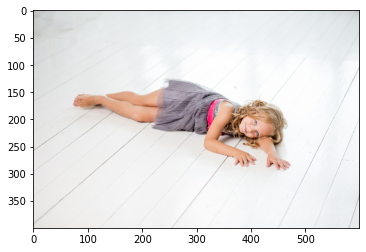

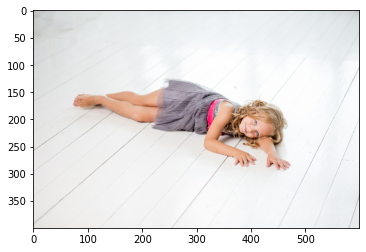

In [18]:
# Importing original picture
my_image_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/rotated.png'
img_bgr = cv2.imread(my_image_path)
img_bgr = cv2.resize(img_bgr, (600, 400))
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)

# shaping a box
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l, t), (r, b), (0, 255, 0), 2, lineType=cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

# landmark
model_path = os.getenv("HOME") + '/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

---
## Conclusion

* For image number 2, the glasses were not the obstacles to detect the face but the buttons on the shirt distracted the system
* For image number 4, the masquerade mask was too big, which made it impossible to detect the face
* For image number 5, the face was rotated sideways which is apparently not detectable


By testing on different pictures, I found out that small objects such as glasses or hats won't affect the detection unless they don't cover up too much. <br/>
However, there must be a way to detect the faces even with the big objects. <br/>
dlib includes two face detection methods built into the library. <br/>
The first one is what I've been using, the **HOG + Linear SVM face detector** <br/>
and the second one is the **Max-Margin (MMOD) CNN face detector**

### MMOD Human Face Detector

pre-trained model was downloaded from [here](http://dlib.net/cnn_face_detector.py.html)

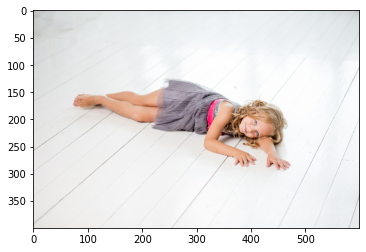

Number of faces detected: 1
Detection 0: Left: 375 Top: 187 Right: 423 Bottom: 234 Confidence: 0.9930518865585327


In [19]:
import dlib

cnn_face_detector = dlib.cnn_face_detection_model_v1(os.getenv("HOME") + '/aiffel/camera_sticker/models/mmod_human_face_detector.dat')

my_image_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/rotated.png'
img_bgr = cv2.imread(my_image_path)
img_bgr = cv2.resize(img_bgr, (600, 400))
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

dets = cnn_face_detector(img_rgb, 1)

print("Number of faces detected: {}".format(len(dets)))

for i, d in enumerate(dets):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {} Confidence: {}".format(
        i, d.rect.left(), d.rect.top(), d.rect.right(), d.rect.bottom(), d.confidence))

rects = dlib.rectangles()
rects.extend([d.rect for d in dets])

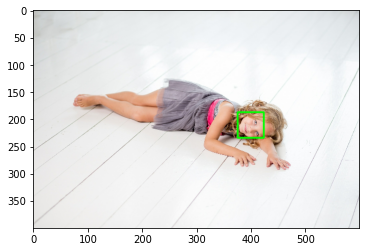

In [20]:
for dlib_rect in rects:
    l = d.rect.left()
    t = d.rect.top()
    r = d.rect.right()
    b = d.rect.bottom()
    
    cv2.rectangle(img_show, (l, t), (r, b), (0, 255, 0), 2, lineType=cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

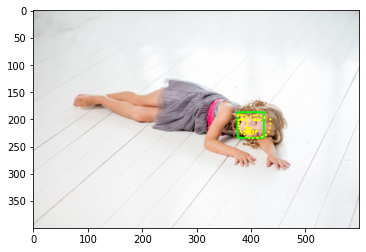

In [21]:
model_path = os.getenv("HOME") + '/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

-64.35899417569473
(91, 91, 3)


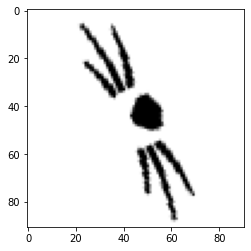

In [22]:
tan_theta = (landmark[45][0]-landmark[30][0])/(landmark[45][1]-landmark[30][1])
theta = np.arctan(tan_theta)
rotate_angle = theta *180/math.pi
print(rotate_angle)

def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR,borderValue=(255,255,255))
  return result

sticker_rotate = rotate_image(img_sticker,rotate_angle)
print(sticker_rotate.shape)
plt.imshow(sticker_rotate)
plt.show()

(393, 217)
(x,y) : (393,193)
(w,h) : (49,49)
(x, y): (369, 169)


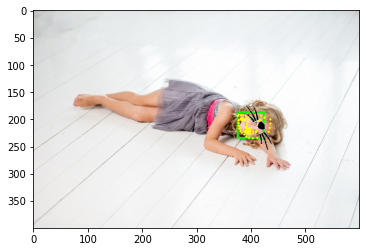

In [23]:
for dlib_rect, landmark in zip(rects, list_landmarks):
    print (landmark[33]) # nose center index : 33
    x = landmark[33][0]
    y = landmark[33][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

refined_x = x - w //2
refined_y = y - w //2
print('(x, y): (%d, %d)'%(refined_x, refined_y))

sticker_area = img_show[refined_y:refined_y+sticker_rotate.shape[0], refined_x:refined_x+sticker_rotate.shape[1]]
img_show[refined_y:refined_y+sticker_rotate.shape[0], refined_x:refined_x+sticker_rotate.shape[1]] = \
    np.where(sticker_rotate==255, sticker_area, sticker_rotate).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

### close enough
Cannot rotate the landmarks therefore putting stickers in the right place was not possible. <br/>
However, I was able to detect the face that was not detectable before.

### tried MMOD human face detector on mask and glasses images

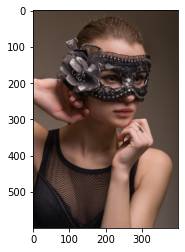

Number of faces detected: 0


In [24]:
my_image_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/mask.png'
img_bgr = cv2.imread(my_image_path)
img_bgr = cv2.resize(img_bgr, (400, 600))
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

dets = cnn_face_detector(img_rgb, 1)

print("Number of faces detected: {}".format(len(dets)))

for i, d in enumerate(dets):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {} Confidence: {}".format(
        i, d.rect.left(), d.rect.top(), d.rect.right(), d.rect.bottom(), d.confidence))

rects = dlib.rectangles()
rects.extend([d.rect for d in dets])

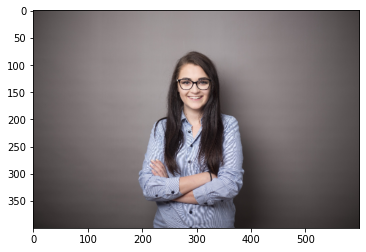

Number of faces detected: 1
Detection 0: Left: 265 Top: 102 Right: 333 Bottom: 170 Confidence: 1.0487990379333496


In [25]:
my_image_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/glasses.png'
img_bgr = cv2.imread(my_image_path)
img_bgr = cv2.resize(img_bgr, (600, 400))
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

dets = cnn_face_detector(img_rgb, 1)

print("Number of faces detected: {}".format(len(dets)))

for i, d in enumerate(dets):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {} Confidence: {}".format(
        i, d.rect.left(), d.rect.top(), d.rect.right(), d.rect.bottom(), d.confidence))

rects = dlib.rectangles()
rects.extend([d.rect for d in dets])

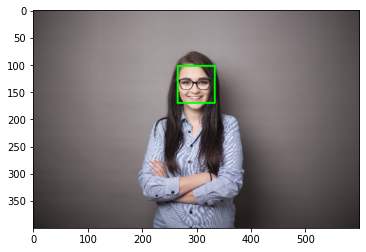

In [26]:
for dlib_rect in rects:
    l = d.rect.left()
    t = d.rect.top()
    r = d.rect.right()
    b = d.rect.bottom()
    
    cv2.rectangle(img_show, (l, t), (r, b), (0, 255, 0), 2, lineType=cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

Even using the MMOD human face detector, the face with the masquerade mask on wasn't detectable <br/>
But was able to detect 2 out of 3 undetected images. 
## yay!